In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.io import savemat

# 常量定义
G = 6.67430e-11  # 万有引力常数, m^3 kg^-1 s^-2
c = 2.998e8  # 光速, m/s
msun = 1.989e30  # 太阳质量, kg
pc = 3.086e16  # pc到m的转换

##### 生成波形以及透镜（时域）

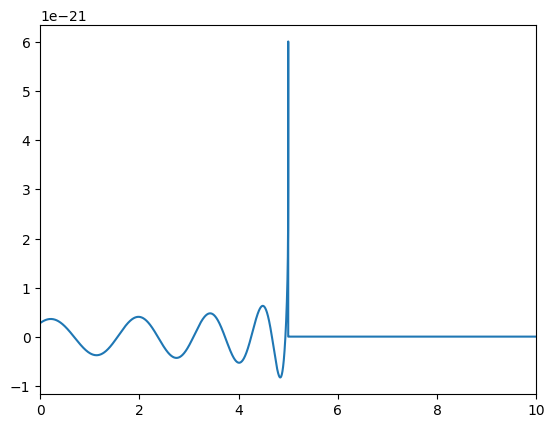

In [4]:
m1 = 36 * msun
m2 = 29 * msun
mc = (m1 * m2 / (m1 + m2) ** 2) ** (3/5) * (m1 + m2)
r = 410 * 1e6 * pc
tc = 5
phi_c = 0
dt = 1 / 16384  # 采样率
t = np.arange(-40, 10, dt)

def generate_h():
    h = np.zeros_like(t)
    mask = (t < tc)
    t_filtered = t[mask]
    
    thetaT = c ** 3 * (tc - t_filtered) / (5 * G * mc)
    h_t = (G * mc / (c**2 * r)) * (thetaT**(-1/4)) * np.cos(0.05 * (2*phi_c - 2*thetaT**(5/8)))
    h[mask] = h_t
    return h

h = generate_h()
mlz = 1e7 * msun    
y = 0.6
def generate_geo():
    u_plus = 1 + 1 /y
    u_minus = -1 + 1 /y
    F_geo = np.sqrt(u_plus) * h

plt.plot(t, h)
plt.xlim(0,10)
plt.show()